# 数据挖掘作业

## 数据集：Video Games Sales

### 数据集包含销售量超过100,000个的视频游戏列表。

#### 数据集各列名含义如下：
<table>
  <thead>
    <tr>
      <th>Field Name</th>
      <th>Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Name</td>
      <td>游戏名称</td>
    </tr>    <tr>
      <td>Platform</td>
      <td>游戏发行平台</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>游戏发行年份</td>
    </tr>
    <tr>
      <td>Genre</td>
      <td>游戏类型</td>
    </tr>
    <tr>
      <td>Publisher</td>
      <td>游戏发行公司</td>
    </tr>
    <tr>
      <td>NA_Sales</td>
      <td>北美销售额（百万美元）</td>
    </tr>
    <tr>
      <td>EU_Sales</td>
      <td>欧洲销售额（百万美元）</td>
    </tr>
    <tr>
      <td>JP_Sales</td>
      <td>日本销售额（百万美元）</td>
    </tr>
    <tr>
      <td>Other_Sales</td>
      <td>全球其他地区销售额（百万美元)</td>
    </tr>
    <tr>
      <td>Global_Sales</td>
      <td>全球总销售额（百万美元）</td>
    </tr>
  </tbody>
</table>

### 1.导库

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
from collections import Counter
from wordcloud import WordCloud
import matplotlib.ticker as tick
%pylab inline
warnings.filterwarnings("ignore");

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


### 2.加载数据集

In [50]:
df = pd.read_csv('vgsales.csv')

In [51]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [52]:
df.shape

(16598, 11)

#### 数据集数据量为11列，16598行

In [53]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 数据清洗
- 检测缺失值和去除缺失值
- 将游戏发行年份转换为整形
- 替换发行公司名称

In [54]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### 游戏发行年份和游戏发行公司字段存在缺失值

In [55]:
df = df.dropna()
df['Year'] = df['Year'].astype(int)
df["Platform" ] = df["Platform"].replace(
    ["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB",
     "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360",
     "Super Nintendo Entertainment System",
     "Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation",
     "Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16",
     "3DO Interactive Multiplayer", "NEC PC‑FX"])
df.loc[df['Name'] == "FIFA Soccer 13", "Genre"] = "Sports" 

In [56]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendo Entertainment System,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Define Product Family

In [57]:
df.Platform.unique()

array(['Wii', 'Nintendo Entertainment System', 'Game Boy', 'Nintendo DS',
       'Xbox 360', 'PS3', 'PS2', 'Super Nintendo Entertainment System',
       'Nintendo Game Boy Advance', 'Nintendo 3DS', 'PS4', 'Nintendo 64',
       'PlayStation', 'Xbox', 'PC', '2600', 'PSP', 'Xbox One', 'GC',
       'WiiU', 'GEN', 'DC', 'PlayStation Vita', 'SAT', 'SCD', 'WS', 'NG',
       'TurboGrafx-16', '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX'],
      dtype=object)

In [58]:
PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 
            'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance',
            'Nintendo 3DS', 'Nintendo 64','WiiU']
Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', 
         '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']

In [59]:
def ProductFamily (c):
    if c['Platform'] in PlayStation:
        return 'PlayStation'
    elif c['Platform'] in Nintendo:
        return 'Nintendo'
    elif c['Platform'] in Microsoft:
        return 'Microsoft'
    elif c['Platform'] in Other:
        return 'Other'
    else:
        return 'o'

df['ProductFamily'] = df.apply(ProductFamily, axis=1)

In [60]:
def x_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val
    
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val

### 电子游戏销售分析，问题探索

#### 1.哪个发行平台的游戏最多？
#### 2.哪个产品系列销售额最高？
#### 3.最受欢迎的游戏类型？
#### 4.全球销售额情况？
#### 5.最受欢迎的游戏名称？
#### 6.自1980年以来全球销售情况
#### 7.Wii，Playstation和Xbox等游戏机，过去10多年的全球销量
#### 8.全球销量排名前十的游戏，在不同区域的销售情况

### 1: 不同平台游戏数量

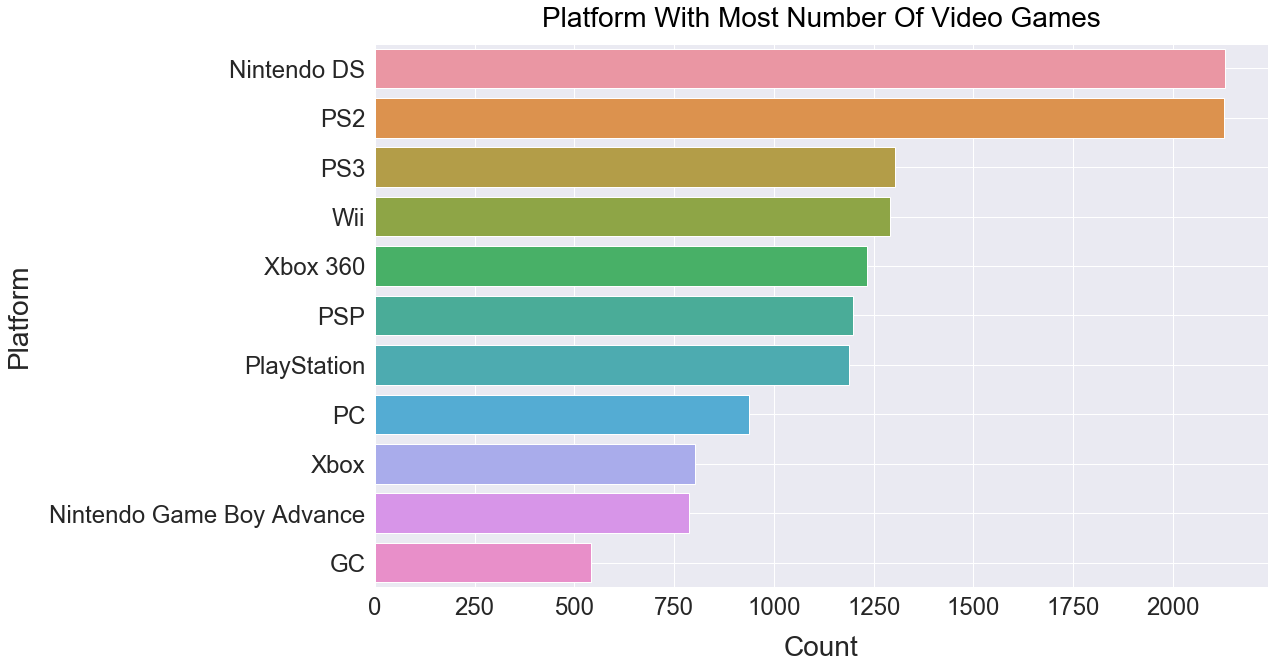

In [61]:
sns.set_style("darkgrid")
num_games=df.groupby('Platform').size().sort_values(ascending=False).reset_index()[:11]
num_games.columns=['Platform', 'Count']
plt.figure(figsize=(16,10))
sns.barplot(y=num_games["Platform"], x=num_games["Count"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Platform", labelpad=16, fontsize=28)
plt.xlabel("Count", labelpad=16, fontsize=28)
plt.grid(True)
plt.title("Platform With Most Number Of Video Games", color='Black', fontsize=28, y=1.02)
plt.show();

#### 结果：
1. Nintendo DS平台上拥有最多的视频游戏，其次是PS2。
2. 与Nintendo DS和PS2相比，PS3，Wii和Xbox 360平台的游戏量仅占全部游戏量的50％

### 2:不同产品系列的销售额

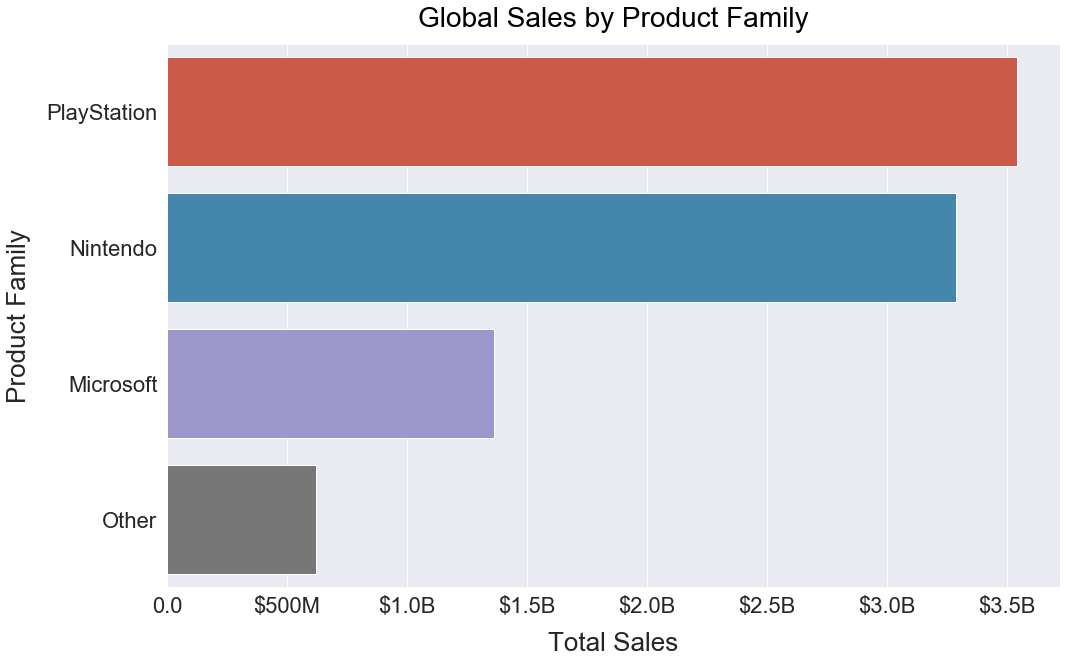

In [62]:
sns.set_style("darkgrid")
Pfamily_sale = df.groupby('ProductFamily')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.barplot(y=Pfamily_sale["ProductFamily"], x=Pfamily_sale["Global_Sales"], linewidth=1)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.ylabel("Product Family", labelpad=15, fontsize=26)
plt.xlabel("Total Sales", labelpad=15, fontsize=26)
plt.title("Global Sales by Product Family", color='Black', fontsize=28, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### 结果：
1.PlayStation是有史以来最手欢迎的视频游戏系统，其全球销售额最高，超过35亿美元，任天堂名列第二（销售额超过30亿美元）。两家均是视频游戏行业的两家巨头。

### 3: 最受欢迎的游戏类型

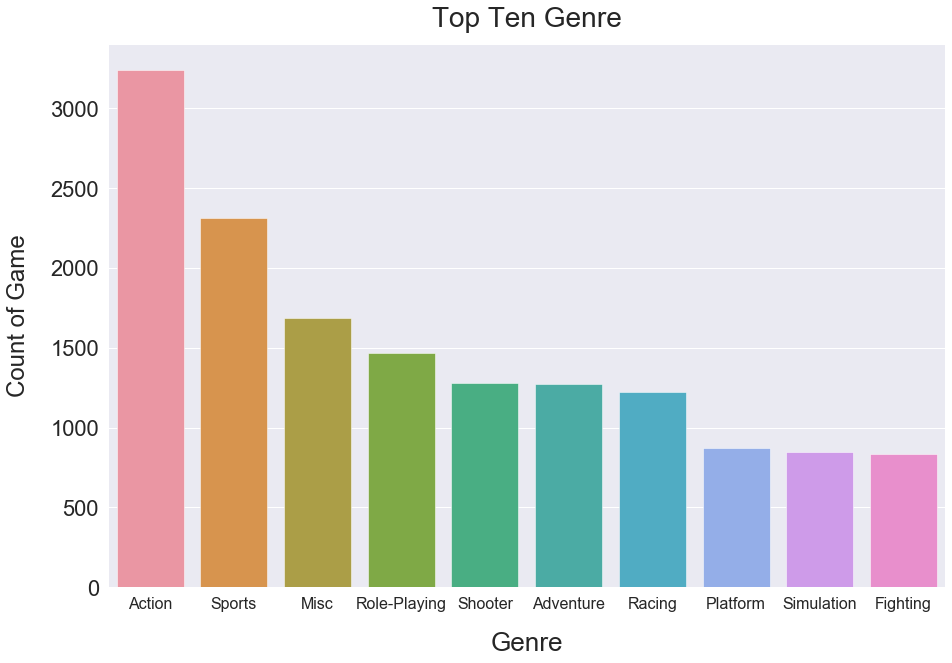

In [63]:
genre = Counter(df['Genre'].dropna().tolist()).most_common(10)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=genre_name, y=genre_counts, ax=ax)
plt.title('Top Ten Genre', fontsize=28, y=1.02)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Genre',labelpad=20, fontsize=26)
plt.ylabel('Count of Game', labelpad=20, fontsize=24)
ticks = plt.setp(ax.get_xticklabels(), fontsize=16, rotation=360)
plt.show();

#### 结果：
1.动作类游戏是最受欢迎的游戏类型之一，其次是体育类。

2.动作类游戏数量多达3000多种。

### 4: 全球视频游戏销售情况

In [64]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales': 'Global_Sales'].round().astype(int)
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']

In [65]:
GenreGroupSales=GenreGroup.loc[:, 'NA_Sales': 'Other_Sales'].reset_index()
GenreGroupSales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,859,506,158,182
1,Adventure,102,64,52,17
2,Fighting,221,100,87,36
3,Misc,397,212,107,74
4,Platform,446,201,131,52
5,Puzzle,122,51,57,12
6,Racing,357,236,57,77
7,Role-Playing,326,188,350,59
8,Shooter,575,310,38,102
9,Simulation,182,113,64,31


In [66]:
Genre=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing',
       'Shooter', 'Simulation', 'Sports', 'Strategy']
RegionSales=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe","JP_Sales":"Japan","Other_Sales":"Other"})

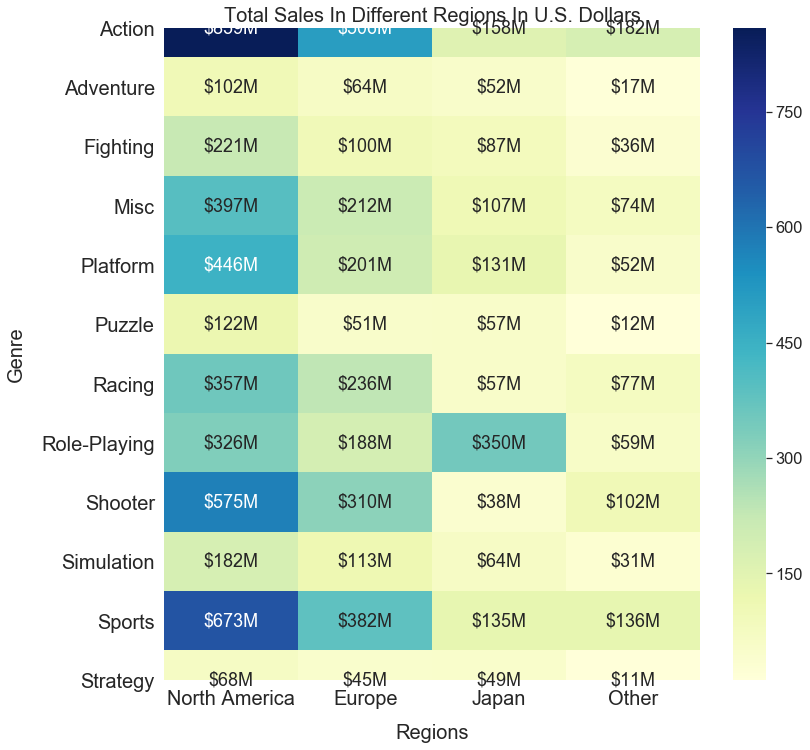

In [67]:
sns.set_context("poster")
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
#ax=sns.heatmap(GenreGroup.loc[:, 'North America': 'Other'],cmap="YlGnBu",annot=True)
ax=sns.heatmap(GenreGroup.loc[:, 'North America': 'Other'], annot=True, fmt = '.0f',cmap="YlGnBu")
for t in ax.texts: t.set_text("$"+t.get_text() + "M")
plt.title("Total Sales In Different Regions In U.S. Dollars", y=1.020, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Regions", labelpad=15, fontsize=20)
plt.ylabel("Genre", labelpad=15, fontsize=20)
plt.show();

#### 结果：
1.动作，体育和射击类游戏在北美的销售额最高。

In [68]:
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales%": "North America Sales%",
                                                 "EU_Sales%": "Europe Sales%",
                                                 "JP_Sales%": "Japan Sales%", 
                                                 "Other_Sales%": "Other Sales%"})

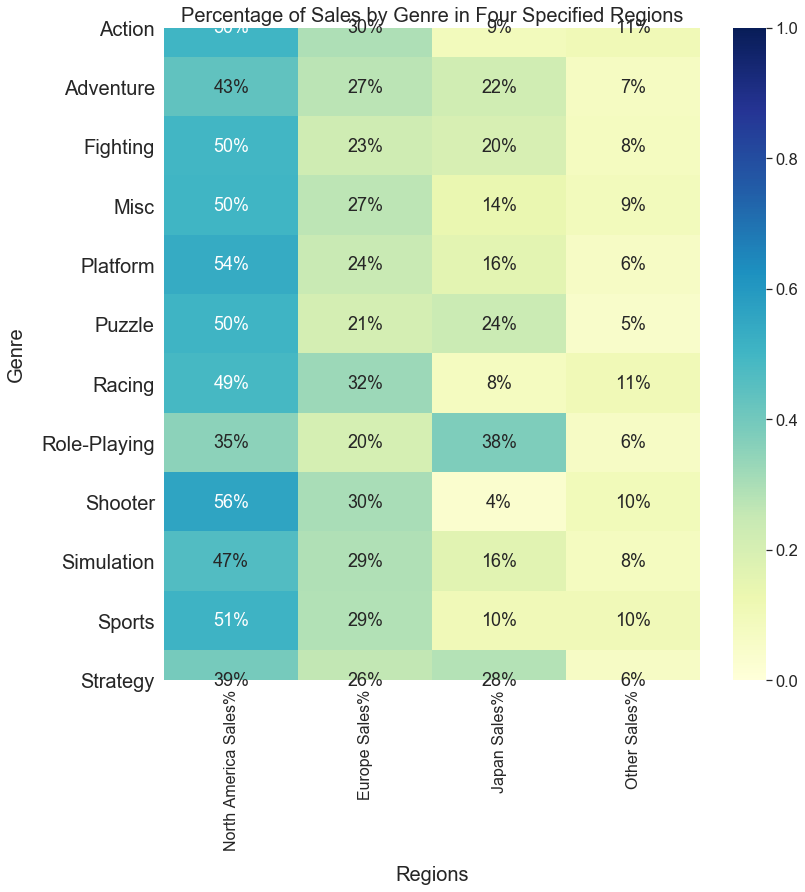

In [69]:
sns.set_context("poster")
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.heatmap(GenreGroup.loc[:,'North America Sales%': 'Other Sales%'], vmax=1, vmin=0, annot=True, 
            fmt = '.0%',cmap="YlGnBu")
plt.title("Percentage of Sales by Genre in Four Specified Regions", y=1.02, fontsize=20)
plt.yticks(fontsize = 20 )
plt.xticks(fontsize = 16 )
plt.xlabel("Regions", labelpad=15, fontsize=20)
plt.ylabel("Genre", labelpad=15, fontsize=20)
plt.show();

#### 结果:
1.在北美地区，几乎所有游戏类型的销售都占全球销售额的50％。

### 5: 最受欢迎的游戏名称

In [70]:
Sports=df[df.Genre == 'Sports']
Actions=df[df.Genre == "Action"]

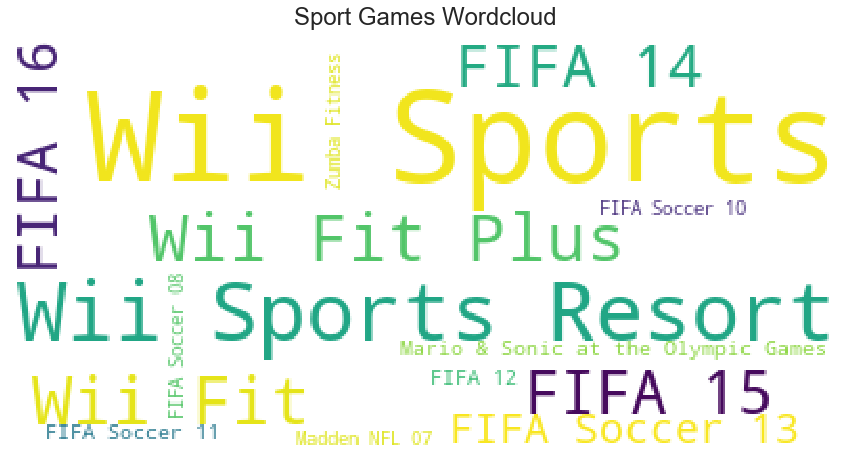

In [71]:
plt.figure(figsize=(15,15))
Sportsale=Sports.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60 
     ).generate_from_frequencies(Sportsale)
plt.imshow(wc)
plt.title("Sport Games Wordcloud", fontsize=24, y=1.02)
plt.axis("off")
plt.show();

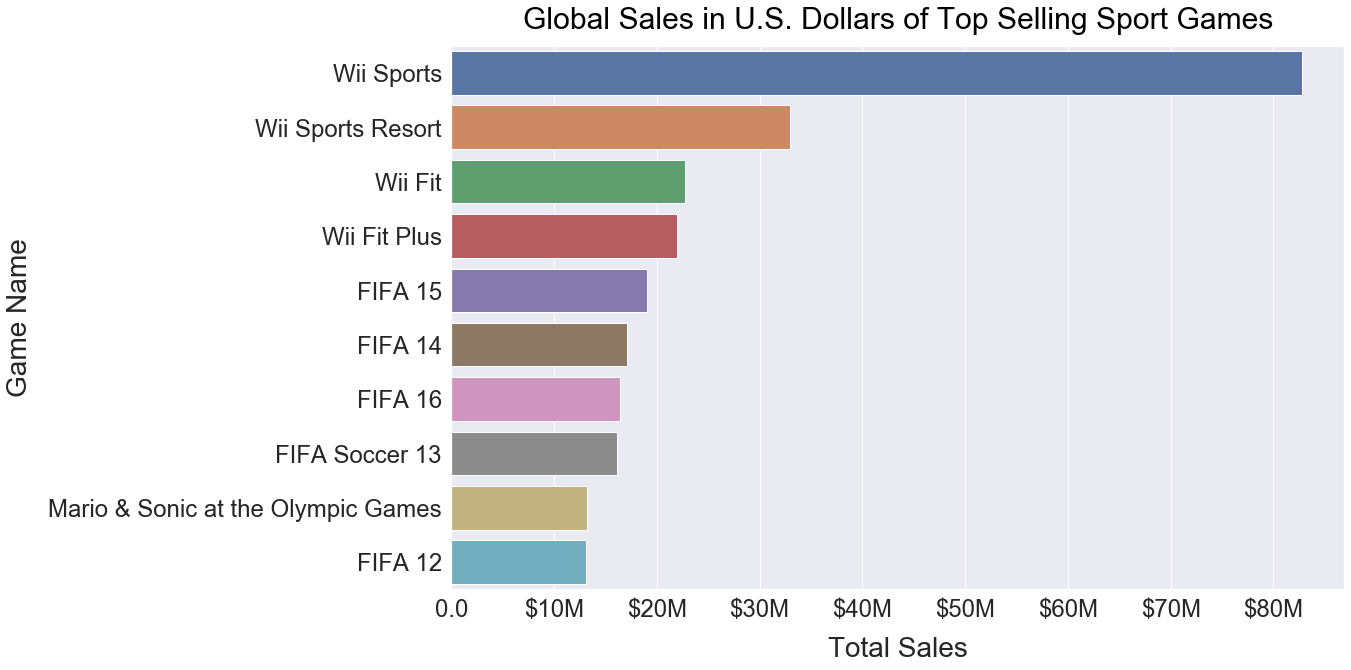

In [72]:
topsales=Sports.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (16,10))
sns.barplot(y=topsales["Name"], x=topsales["Global_Sales"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Game Name", labelpad=15, fontsize=28)
plt.xlabel("Total Sales", labelpad=15, fontsize=28)
plt.title("Global Sales in U.S. Dollars of Top Selling Sport Games", color='Black', fontsize=30, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### 结果
1.在体育类型游戏中，Wii Sports，Wii Sports Resort，Wii Fit和Wii Fit Plus全球销量最高。这四款游戏都是Nintindo Family的一部分。

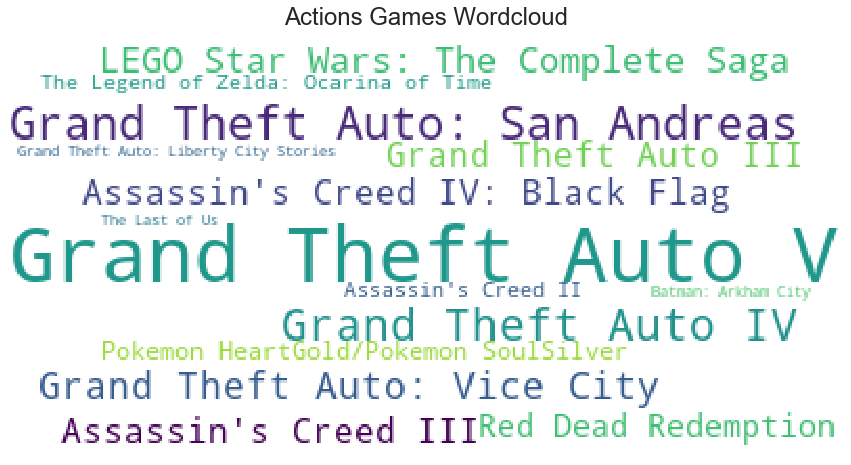

In [73]:
plt.figure(figsize=(15,15))
Actionsale=Actions.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60 
    ).generate_from_frequencies(Actionsale)
plt.imshow(wc)
plt.title("Actions Games Wordcloud", fontsize=24, y=1.02)
plt.axis("off")
plt.show();

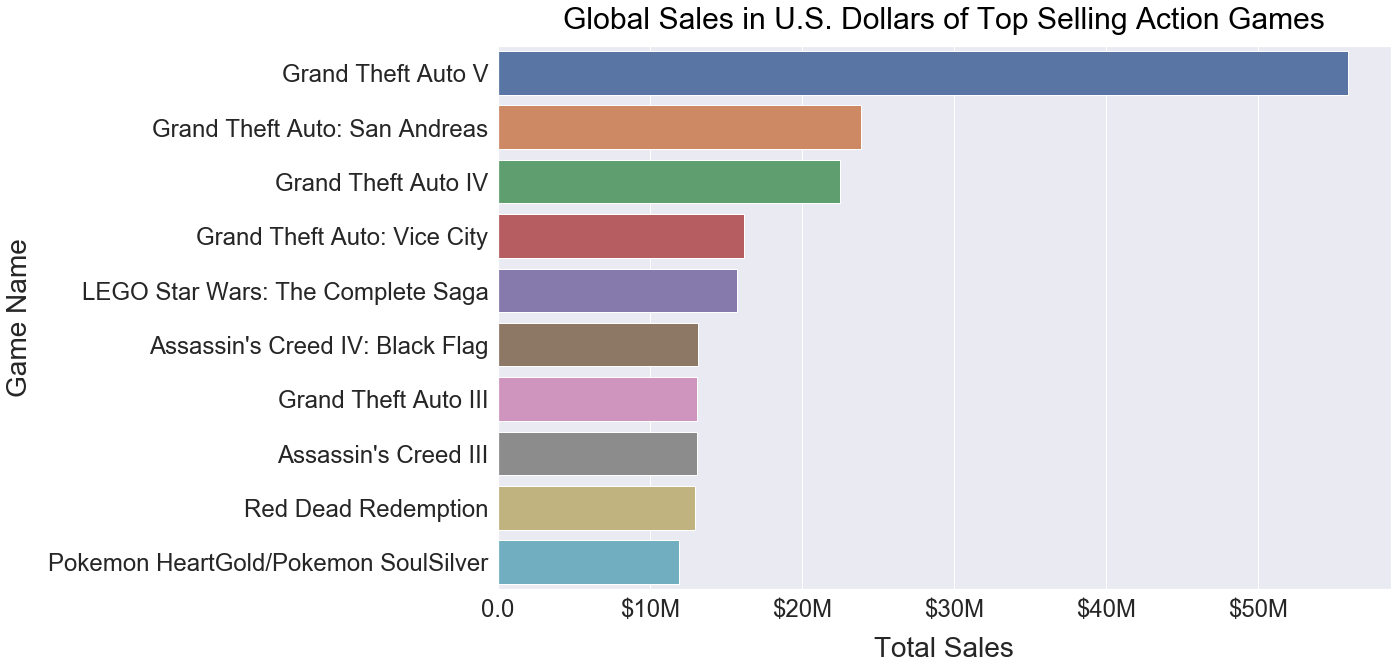

In [74]:
topsales=Actions.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (16,10))
sns.barplot(y=topsales["Name"], x=topsales["Global_Sales"], linewidth=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Game Name", labelpad=15, fontsize=28)
plt.xlabel("Total Sales", labelpad=15, fontsize=28)
plt.title("Global Sales in U.S. Dollars of Top Selling Action Games", color='Black', fontsize=30, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show();

#### 结果:
1.在动作游戏的销售额方面，Grand Theft Auto V销售额全球最高。

### 6: 自1980以来，游戏销售情况

In [75]:
SaleByYear=df.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                              'Global_Sales'].sum().reset_index()
SaleByYear=SaleByYear[SaleByYear.Year<2017]
SaleByYear=SaleByYear.rename(index=str, columns={"NA_Sales": "North America", 
                "EU_Sales": "Europe", "JP_Sales":"Japan", "Other_Sales":"Other"})

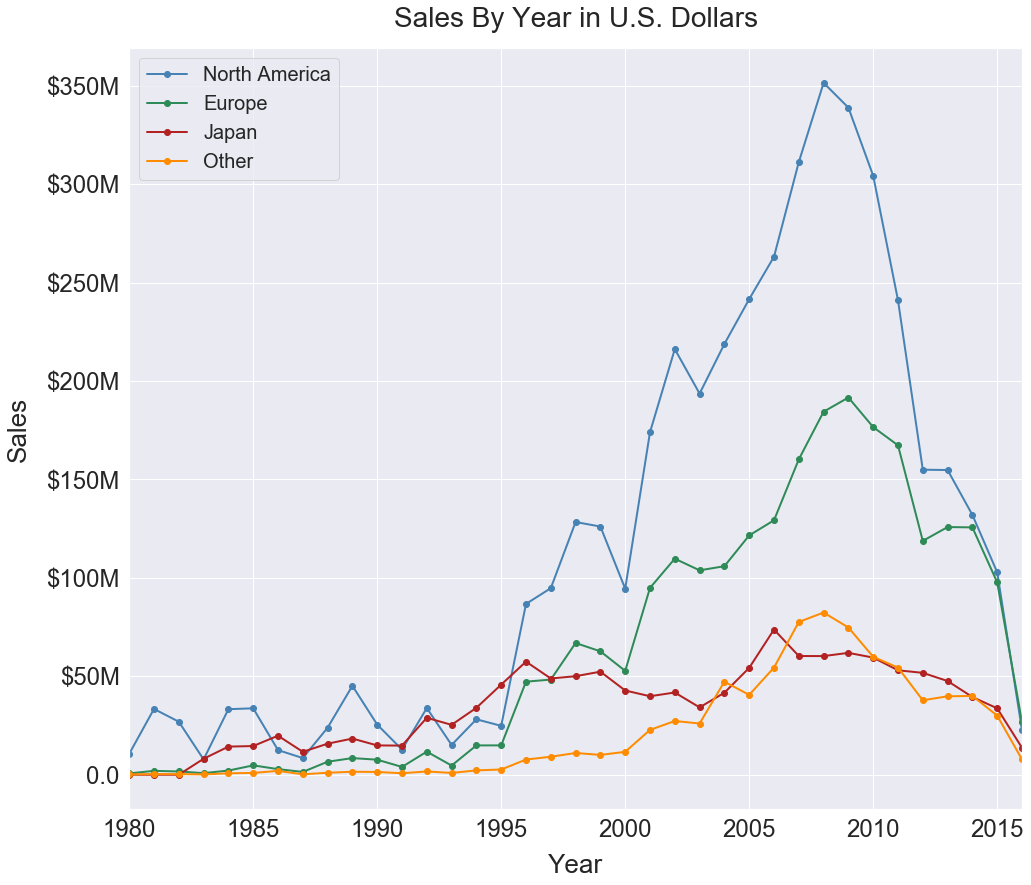

In [76]:
SaleByYear.set_index('Year')[['North America', 'Europe', 'Japan', 'Other']].plot(style='-o', 
    color=('steelblue', "seagreen", "firebrick", "darkorange"), figsize=(16, 14), linewidth=2)
plt.title("Sales By Year in U.S. Dollars", fontsize=28, y=1.02)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )
plt.xlabel("Year", fontsize=26, labelpad=12)
plt.ylabel("Sales", fontsize=26, labelpad=15)
plt.legend(fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.show();

#### 结果:
1.从图可知，自1980年以来销售额一直在增长。在经济衰退即将来临之际，2008年曾达到顶峰，这对视频游戏产业的影响与许多其他行业一样严重。

2.在大多数情况下，北美一直是视频游戏销售的最高者。然而日本在1992年至1996年间短暂超越北美。

### 7: 对于Wii，Playstation和Xbox等游戏机，过去10年的全球销售量

In [77]:
before2011=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [78]:
after2011=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [79]:
combined=pd.merge(before2011, after2011, on="ProductFamily")
combined=combined.rename(index=str, columns={"Global_Sales_x": "2005-2010 Sales", "Global_Sales_y": "2011-2016 Sales"})

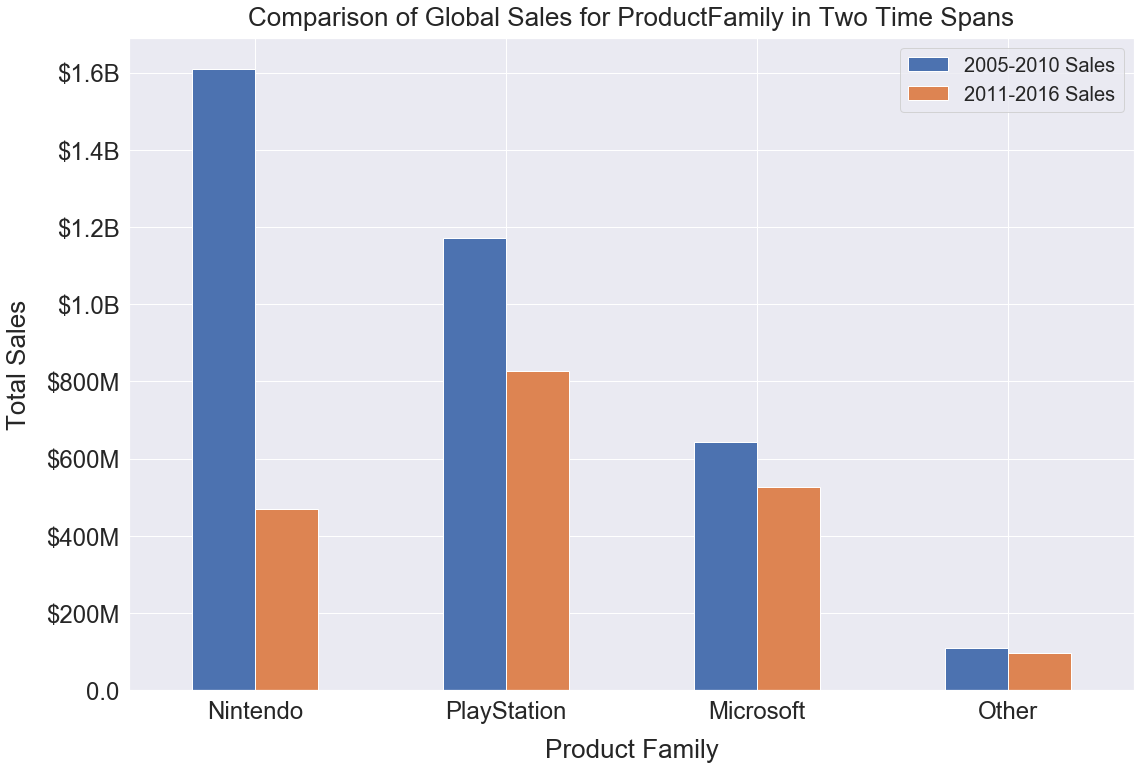

In [80]:
sns.set_style("darkgrid")
combined.set_index('ProductFamily')[['2005-2010 Sales', '2011-2016 Sales']].plot(kind='bar', 
                                                                        figsize=(18, 12))
plt.xticks(rotation=0)
plt.title("Comparison of Global Sales for ProductFamily in Two Time Spans", fontsize=26, y=1.01)
plt.xlabel("Product Family", fontsize=26, labelpad=15)
plt.ylabel("Total Sales", fontsize=26, labelpad=15)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.legend(fontsize=20);

#### Insights:
    1.Nintendo DS在2005年至2010年期间在销售方面取得了巨大成功。
    2.在2011-2016年间，Playstation销量排名第一。
    3.在2011-2016年期间，任天堂的销售额急剧下降。

### 8: 全球销量最高10个游戏，各区域的销售情况

In [81]:
df1=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
df1=df1.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=True).tail(10)

In [82]:
df1

,Name,Platform,Year,Genre,Publisher,North America,Europe,Japan,Other,Global_Sales
9,Duck Hunt,Nintendo Entertainment System,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6,New Super Mario Bros.,Nintendo DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
5,Tetris,Game Boy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,Super Mario Bros.,Nintendo Entertainment System,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


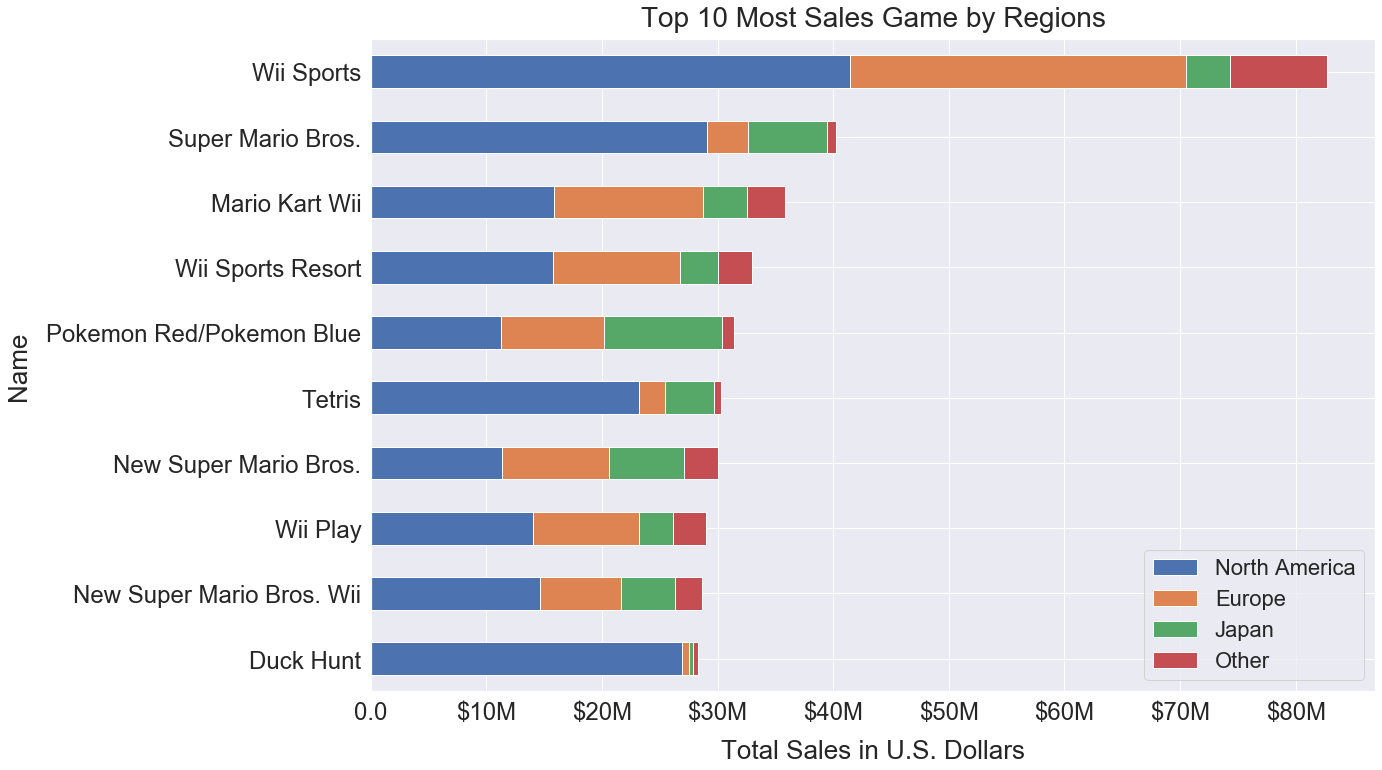

In [83]:
sns.set_style("darkgrid")
ax=df1.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(18, 12), stacked=True)
plt.title("Top 10 Most Sales Game by Regions", fontsize=28, y=1.01)
plt.xlabel("Total Sales in U.S. Dollars", fontsize=26, labelpad=15)
plt.ylabel("Name", fontsize=26, labelpad=15)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.legend(fontsize=22);

#### 结果:
    1.Wii Sports, Super Mario Bros, Duck Hunt and Tetris 在北美有最高销售额。